In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
rain_df=pd.read_csv('Daily_Rainfall_data_from_National_Remote_Sensing_Centre_Agency_during_July_2023.csv')
rain_df.head()

,State,District,Date,Year,Avg_rainfall
0,Andaman & Nicobar,Nicobars,7/1/2023,2023,NaN
1,Andaman & Nicobar,Nicobars,7/2/2023,2023,NaN
2,Andaman & Nicobar,Nicobars,7/3/2023,2023,NaN
3,Andaman & Nicobar,North And Middle Andaman,7/1/2023,2023,NaN
4,Andaman & Nicobar,North And Middle Andaman,7/2/2023,2023,NaN


In [3]:
rain_df.shape

(2199, 5)

In [4]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         2199 non-null   object 
 1   District      2199 non-null   object 
 2   Date          2199 non-null   object 
 3   Year          2199 non-null   int64  
 4   Avg_rainfall  2128 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 86.0+ KB


In [5]:
dty1=rain_df.columns[rain_df.dtypes==object]

In [6]:
from sklearn.preprocessing import LabelEncoder
for i in dty1:
    enc=LabelEncoder()
    rain_df[i] = enc.fit_transform(rain_df[i])
    

In [7]:
rain_df.head()

,State,District,Date,Year,Avg_rainfall
0,0,473,0,2023,NaN
1,0,473,1,2023,NaN
2,0,473,2,2023,NaN
3,0,479,0,2023,NaN
4,0,479,1,2023,NaN


In [8]:
rain_df.isna().sum()

State            0
District         0
Date             0
Year             0
Avg_rainfall    71
dtype: int64

In [9]:
rain_df.dropna(axis=0,inplace=True)
rain_df

,State,District,Date,Year,Avg_rainfall
9,1,24,0,2023,0.10
10,1,24,1,2023,0.68
11,1,24,2,2023,2.43
12,1,134,0,2023,0.18
13,1,134,1,2023,1.15
...,...,...,...,...,...
2194,36,526,1,2023,9.14
2195,36,526,2,2023,0.18
2196,36,530,0,2023,5.33
2197,36,530,1,2023,9.58


In [10]:
rain_df.describe()

,State,District,Date,Year,Avg_rainfall
count,2128.000000,2128.000000,2128.000000,2128.0,2128.000000
mean,20.078008,361.753289,0.989192,2023.0,10.292491
std,10.929467,211.006086,0.814984,0.0,18.006377
min,1.000000,0.000000,0.000000,2023.0,0.000000
25%,11.000000,178.000000,0.000000,2023.0,0.497500
50%,21.000000,361.000000,1.000000,2023.0,3.135000
75%,31.000000,544.250000,2.000000,2023.0,12.220000
max,36.000000,728.000000,2.000000,2023.0,182.870000


<Axes: xlabel='Avg_rainfall'>

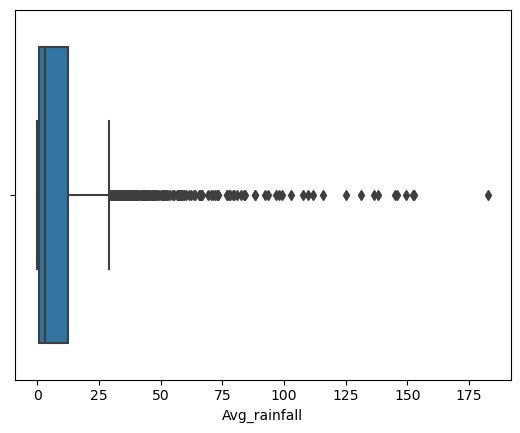

In [11]:
import seaborn as sns

sns.boxplot(x=rain_df['Avg_rainfall'])

In [12]:
condition = rain_df['Avg_rainfall']>20 # Return a boolean DataFrame
outliers = rain_df[condition] # Outlier rows
new_rain_df = rain_df.drop(outliers.index, axis=0) #Delete outliers
print('Shape of rain_df: {}'.format(rain_df.shape))
print('Shape of new_rain_df: {}'.format(new_rain_df.shape))

Shape of rain_df: (2128, 5)
Shape of new_rain_df: (1792, 5)


<Axes: xlabel='Avg_rainfall'>

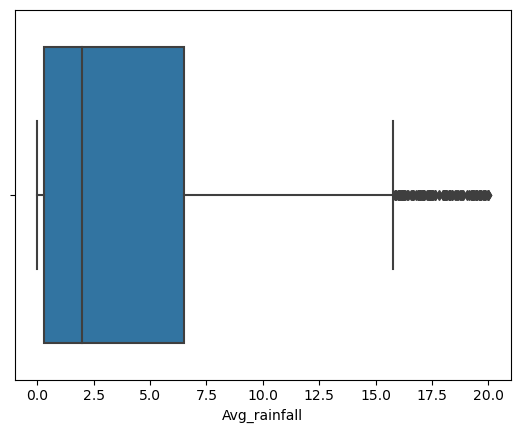

In [13]:
import seaborn as sns

sns.boxplot(x=new_rain_df['Avg_rainfall'])

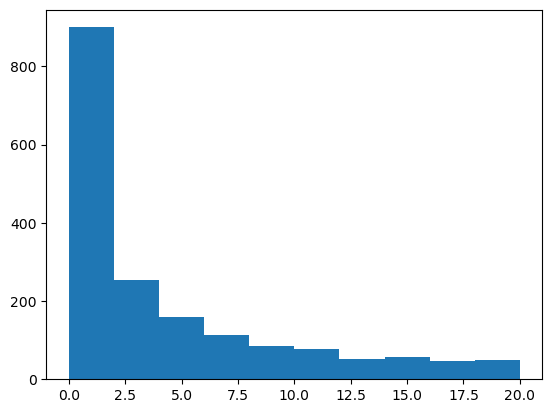

In [14]:
import matplotlib.pyplot as plt

plt.hist(new_rain_df['Avg_rainfall'])
plt.show()

In [16]:
import math
#math.log(df['Budget'])
new_rain_df['Avg_rainfall'] = new_rain_df['Avg_rainfall'].apply(math.sqrt)
new_rain_df['Avg_rainfall']


9       0.316228
10      0.824621
11      1.558846
12      0.424264
13      1.072381
          ...   
2194    3.023243
2195    0.424264
2196    2.308679
2197    3.095158
2198    3.103224
Name: Avg_rainfall, Length: 1792, dtype: float64

In [17]:
new_rain_df['Avg_rainfall'].skew()

0.5446523616936366

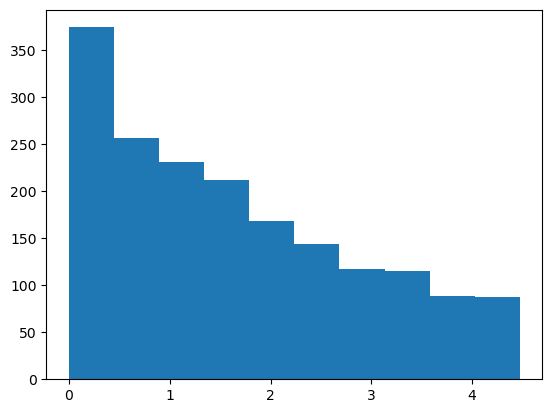

In [18]:
plt.hist(new_rain_df['Avg_rainfall'])
plt.show()